### 1b Build a logistic regression model 

### Step 1: visualization of the data 

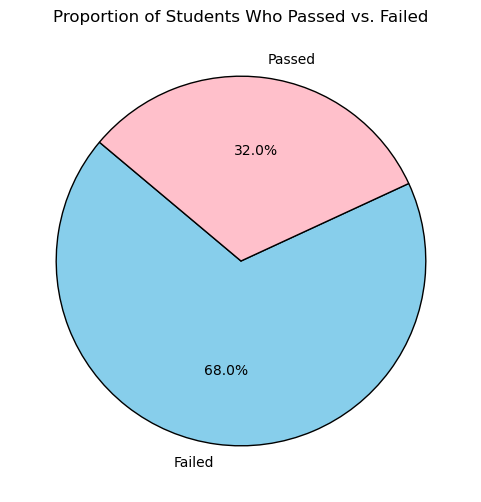

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\shoba\Downloads\student_data.csv"
df = pd.read_csv(file_path)

# Count the number of students who passed and failed
result_counts = df["Results"].value_counts()

# Define labels
labels = ["Failed", "Passed"]

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(result_counts, labels=labels, autopct='%1.1f%%', colors=["skyblue", "pink"], startangle=140, wedgeprops={'edgecolor': 'black'})

# Title
plt.title("Proportion of Students Who Passed vs. Failed")

# Show the plot
plt.show()


### Step 2 : fit a model using logistic regression

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Define features (X) and target variable (y)
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the logistic regression model on the entire dataset
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

# Make predictions
y_pred = log_reg.predict(X_scaled)
y_prob = log_reg.predict_proba(X_scaled)[:, 1]  # Probabilities for the positive class

# Get model coefficients
coefficients = log_reg.coef_
intercept = log_reg.intercept_

# Compute accuracy
accuracy = accuracy_score(y, y_pred)

# Compute AUC (Area Under the Curve)
auc_score = roc_auc_score(y, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y, y_prob)

# Print results
print(f"Model Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Accuracy: {accuracy:.2f}")
print(f"AUC Score: {auc_score:.2f}")
print("Classification Report:\n", classification_report(y, y_pred))




Model Coefficients: [[3.00072026 1.00361597]]
Intercept: [2.01522384]
Accuracy: 0.92
AUC Score: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.95      0.93      0.94        68

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100



### Step 3 : Ploting ROC and AUC

c:\Users\shoba\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\shoba\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


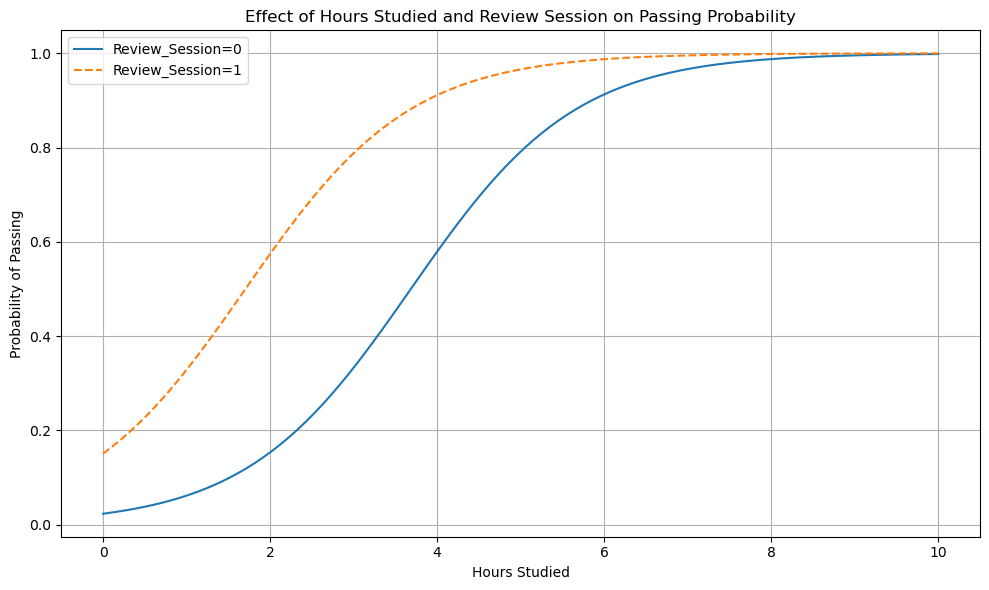

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



# Define features (X) and target variable (y)
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

# Generate probabilities for different values of hours studied
hours_studied = np.linspace(0, 10, 100).reshape(-1, 1)
review_session_0 = np.zeros_like(hours_studied)  # No review session
review_session_1 = np.ones_like(hours_studied)   # With review session

# Combine features and standardize using the same scaler
X_test_0 = scaler.transform(np.hstack((hours_studied, review_session_0)))
X_test_1 = scaler.transform(np.hstack((hours_studied, review_session_1)))

# Predict probabilities
probability_0 = log_reg.predict_proba(X_test_0)[:, 1]  # Probability of passing when Review_Session=0
probability_1 = log_reg.predict_proba(X_test_1)[:, 1]  # Probability of passing when Review_Session=1

# Plot the logistic regression curve
plt.figure(figsize=(10,6))
plt.plot(hours_studied, probability_0, label='Review_Session=0')
plt.plot(hours_studied, probability_1, label='Review_Session=1', linestyle='--')

plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Effect of Hours Studied and Review Session on Passing Probability')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2:  Understanding and Prevent Overfitting in the context of SVM 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Extract features and target variable
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Train an SVM with a linear kernel
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
linear_accuracy = accuracy_score(y_test, y_pred_linear)
print(f"Linear Kernel SVM Accuracy: {linear_accuracy:.4f}")

# Step 2: Train an SVM with an RBF kernel using GridSearchCV for optimal gamma
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}
svm_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
svm_rbf.fit(X_train, y_train)

# Best parameters and accuracy
y_pred_rbf = svm_rbf.best_estimator_.predict(X_test)
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)
print(f"Best RBF Kernel Parameters: {svm_rbf.best_params_}")
print(f"RBF Kernel SVM Accuracy: {rbf_accuracy:.4f}")

# Plot decision boundary for RBF Kernel
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Hours Studied')
    plt.ylabel('Review Session')
    plt.title('SVM with RBF Kernel')
    plt.show()




Linear Kernel SVM Accuracy: 0.8500
Best RBF Kernel Parameters: {'C': 1, 'gamma': 1}
RBF Kernel SVM Accuracy: 0.8500
